In [1]:
# set path to parent file
from pathlib import Path
import os
cwd_path = Path.cwd()
set_path = str(cwd_path.parent)
os.chdir(set_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import importlib
import SimulatedAnealing 
importlib.reload(SimulatedAnealing)
SimulatedAnnealing = SimulatedAnealing.SimulatedAnnealing
mpl.rcParams['figure.dpi'] = 300
from rana import rana_func

In [55]:
random_seed = 1
x_length = 5
maximum_markov_chain_length = 50
bound_enforcing_method = "not_clipping"

# Notes
    - seems like the "better" methods don't explore enough at the start
    - step size control makes big difference (clipp and initialisation)
    - fancy temperature annealing doesn't help - need to read literature (maybe coeff of variation type thing would be better?)

# With Cholesky

In [56]:
np.random.seed(random_seed)
x_max = 500
x_min = -x_max
rana_2d_chol = SimulatedAnnealing(x_length=x_length, x_bounds=(x_min, x_max), objective_function=rana_func,
                              pertubation_method = "Cholesky", maximum_archive_length=100, maximum_markov_chain_length=maximum_markov_chain_length,
                                   maximum_function_evaluations=10000, with_restarts=False, bound_enforcing_method=bound_enforcing_method)
x_result_chol, objective_result_chol = rana_2d_chol.run()
print(f"x_result = {x_result_chol} \n objective_result = {objective_result_chol} \n "
      f"number of function evaluations = {rana_2d_chol.objective_function_evaluation_count}")

x_result = [-380.1843143  -478.32665224 -380.26588712  455.63654818  498.81228002] 
 objective_result = -1350.446129549161 
 number of function evaluations = 10022


# With diagonal thing

In [58]:
np.random.seed(random_seed )
x_max = 500
x_min = -x_max   #  annealing_schedule = "adaptive_cooling", 
rana_2d_diag = SimulatedAnnealing(x_length=x_length, x_bounds=(x_min, x_max), objective_function=rana_func,
                              pertubation_method = "Diagonal", maximum_archive_length=100, step_size_initialisation_fraction_of_range=0.5,
                                  maximum_markov_chain_length=maximum_markov_chain_length, with_restarts=False, bound_enforcing_method=bound_enforcing_method,
                                   maximum_function_evaluations=10000)
# annealing_schedule = "adaptive_cooling", 
x_result_diag, objective_result_diag = rana_2d_diag.run()
print(f"x_result = {x_result_diag} \n objective_result = {objective_result_diag} \n "
      f"number of function evaluations = {rana_2d_diag.objective_function_evaluation_count}")

archive_x_diag = np.array([x_archive for x_archive, f_archive in rana_2d_diag.archive])
archive_f_diag = np.array([f_archive for x_archive, f_archive in rana_2d_diag.archive])

x_result = [-424.32197134 -405.57628475 -390.35639148 -499.42856306   32.10432777] 
 objective_result = -1407.417422747792 
 number of function evaluations = 10027


# Simple

In [59]:
np.random.seed(random_seed )
x_max = 500
x_min = -x_max
rana_2d = SimulatedAnnealing(x_length=x_length, x_bounds=(x_min, x_max), objective_function=rana_func,
                             maximum_archive_length=100, maximum_markov_chain_length=maximum_markov_chain_length, 
                             bound_enforcing_method=bound_enforcing_method,
                                   maximum_function_evaluations=10000)
x_result, objective_result = rana_2d.run()
print(f"x_result = {x_result} \n objective_result = {objective_result} \n "
      f"number of function evaluations = {rana_2d.objective_function_evaluation_count}")

archive_x = np.array([x_archive for x_archive, f_archive in rana_2d.archive])
archive_f = np.array([f_archive for x_archive, f_archive in rana_2d.archive])

x_result = [-257.98515766  400.04534234 -428.19350684 -237.45504452  195.6427883 ] 
 objective_result = -1318.2885190340796 
 number of function evaluations = 10040


# Reults

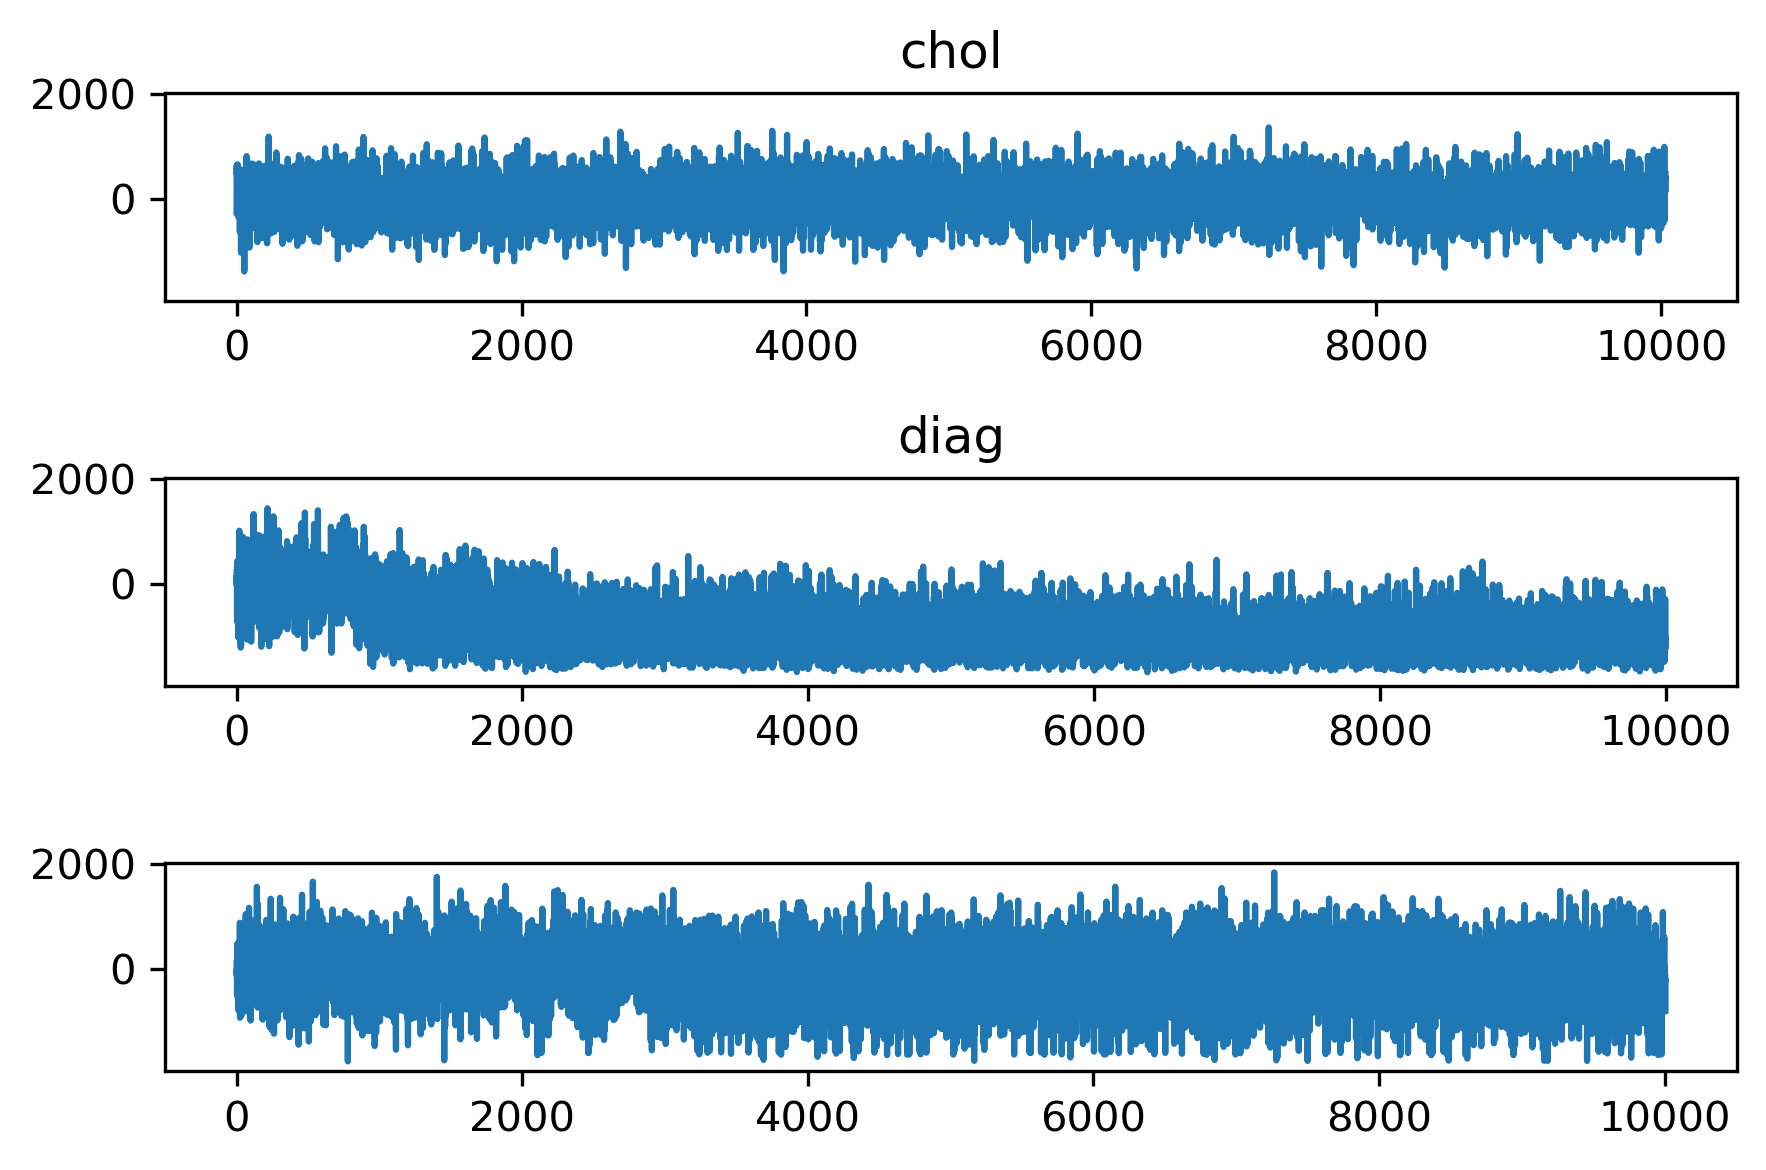

In [49]:
fig, axs = plt.subplots(3, sharey=True)
axs[0].plot(rana_2d_chol.objective_history, label="chol")
axs[1].plot(rana_2d_diag.objective_history, label="diag")
axs[2].plot(rana_2d.objective_history, label="simple")
axs[0].set_title("chol")
axs[1].set_title("diag")
plt.tight_layout()

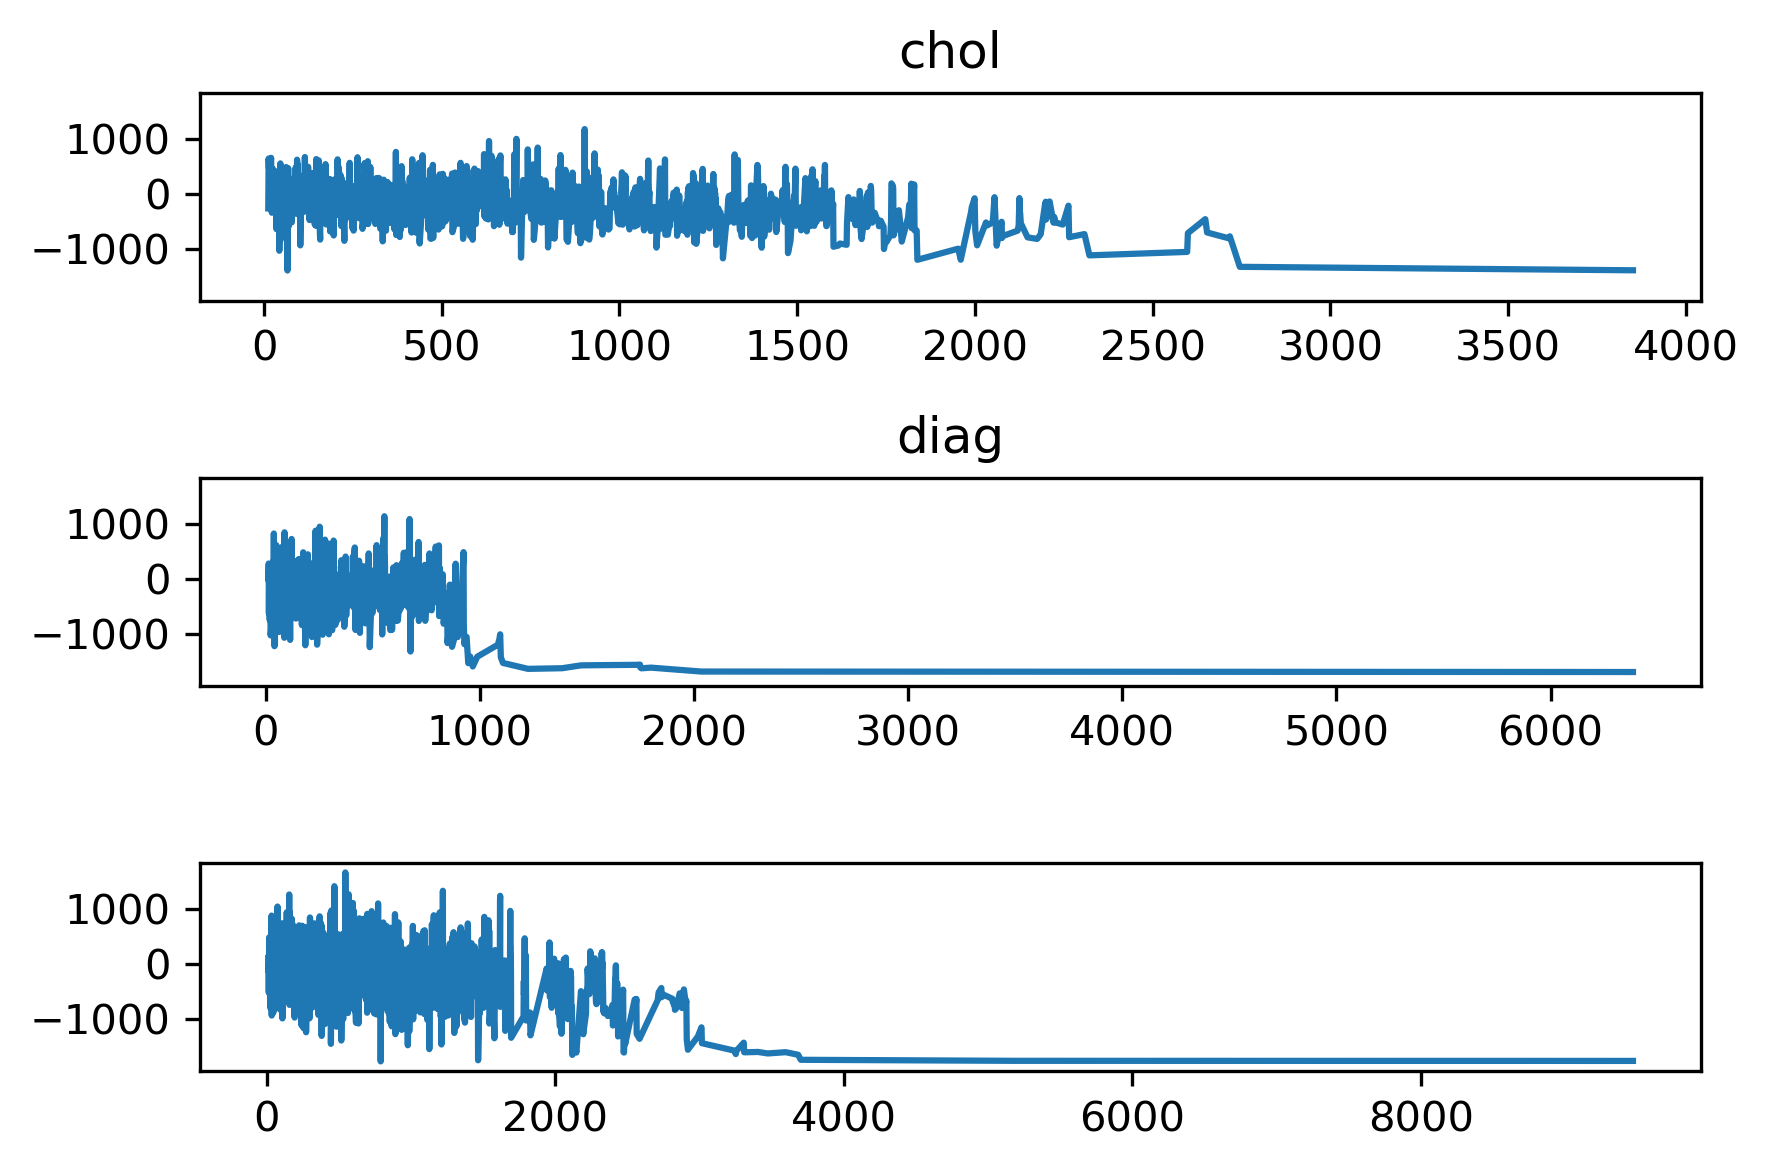

In [50]:
fig, axs = plt.subplots(3, sharey=True)
axs[0].plot(rana_2d_chol.accepted_objective_history_array[:, 1], rana_2d_chol.accepted_objective_history_array[:, 0], label="chol")
axs[1].plot(rana_2d_diag.accepted_objective_history_array[:, 1], rana_2d_diag.accepted_objective_history_array[:, 0], label="diag")
axs[2].plot(rana_2d.accepted_objective_history_array[:, 1], rana_2d.accepted_objective_history_array[:, 0], label="simple")
axs[0].set_title("chol")
axs[1].set_title("diag")
plt.tight_layout()

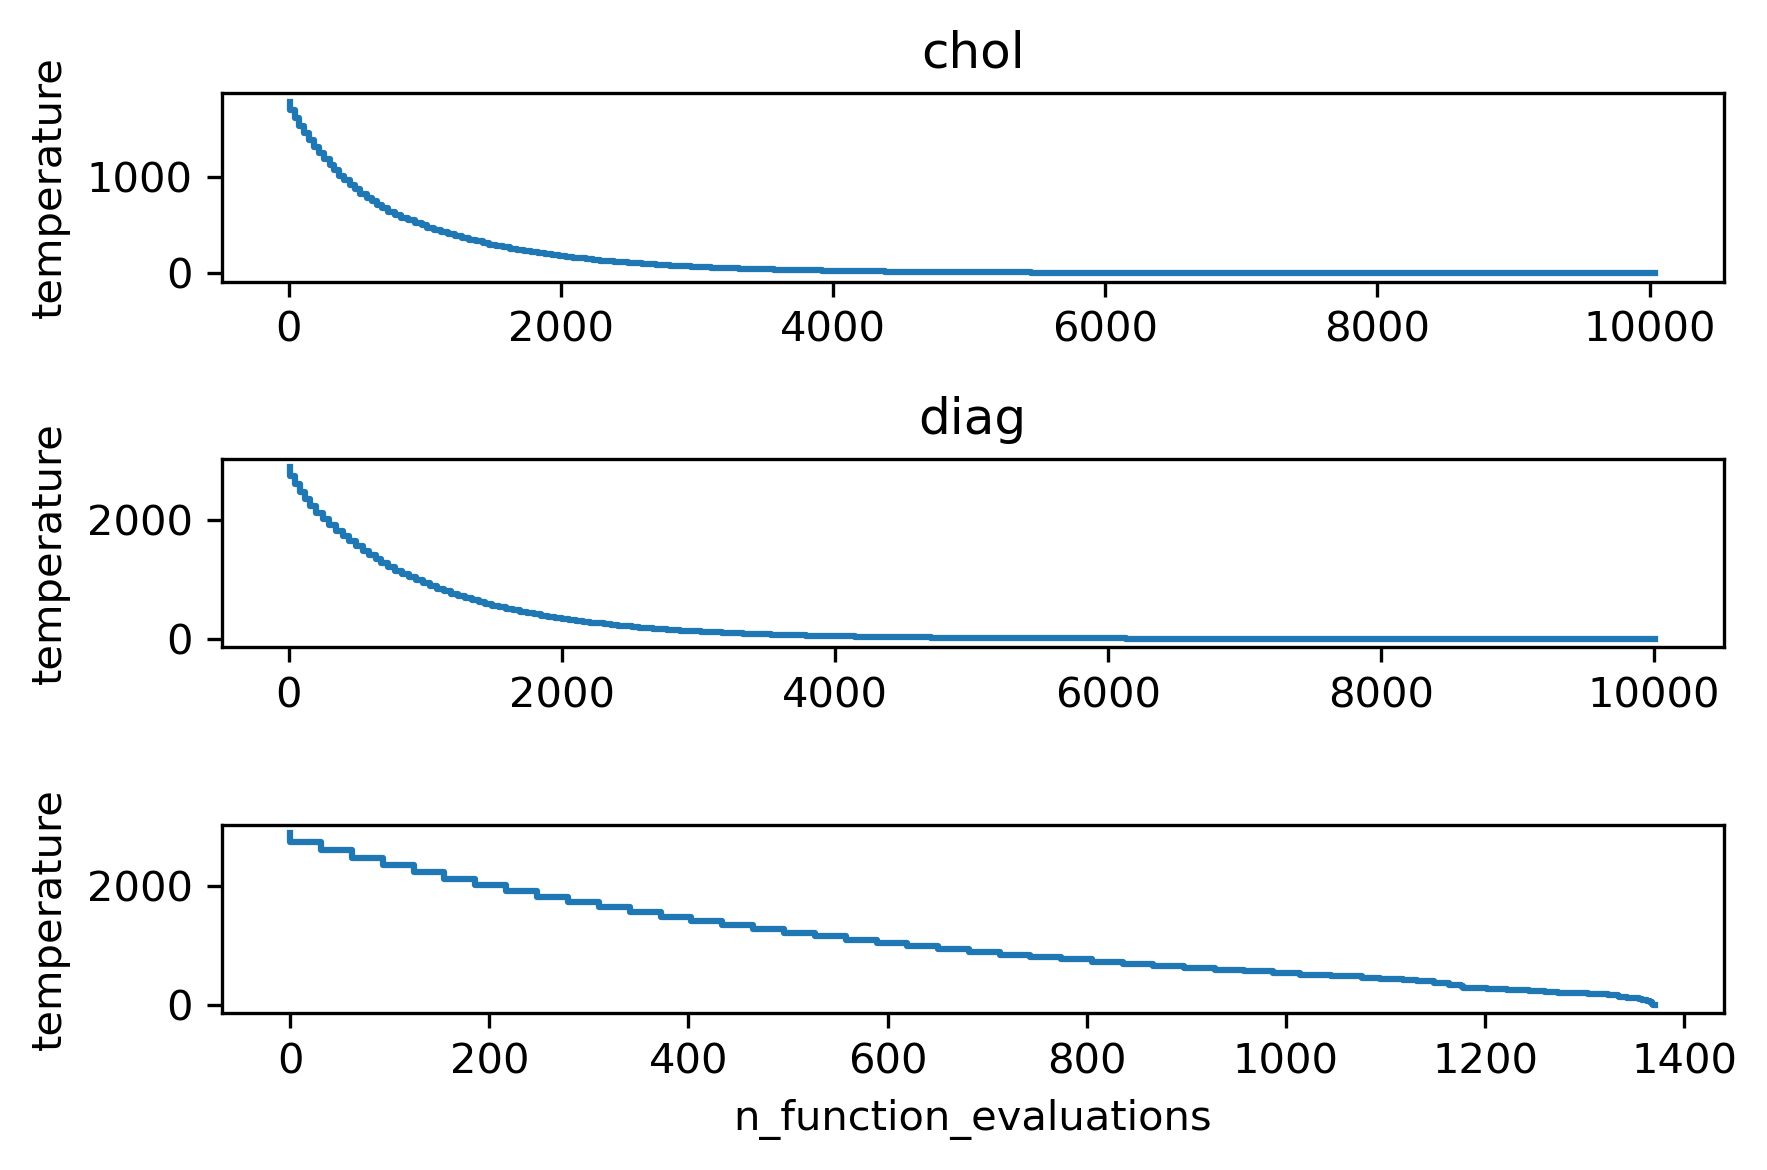

In [51]:
# temperature history
fig, axs = plt.subplots(3)
temp_history_chol = np.array(rana_2d_chol.temperature_history)
axs[0].step(temp_history_chol[:, 2], temp_history_chol[:, 0], label="chol")
temp_history_diag = np.array(rana_2d_diag.temperature_history)
axs[1].step(temp_history_diag[:, 2], temp_history_diag[:, 0], label="diag")
temp_history = np.array(rana_2d.temperature_history)
axs[2].step(temp_history[:, 1], temp_history[:, 0], label="simple")


axs[0].set_title("chol")
axs[1].set_title("diag")
axs[0].set_ylabel("temperature")
axs[1].set_ylabel("temperature")
axs[2].set_ylabel("temperature")
axs[2].set_xlabel("n_function_evaluations")
plt.tight_layout()

Text(112.91666666666667, 0.5, 'probability')

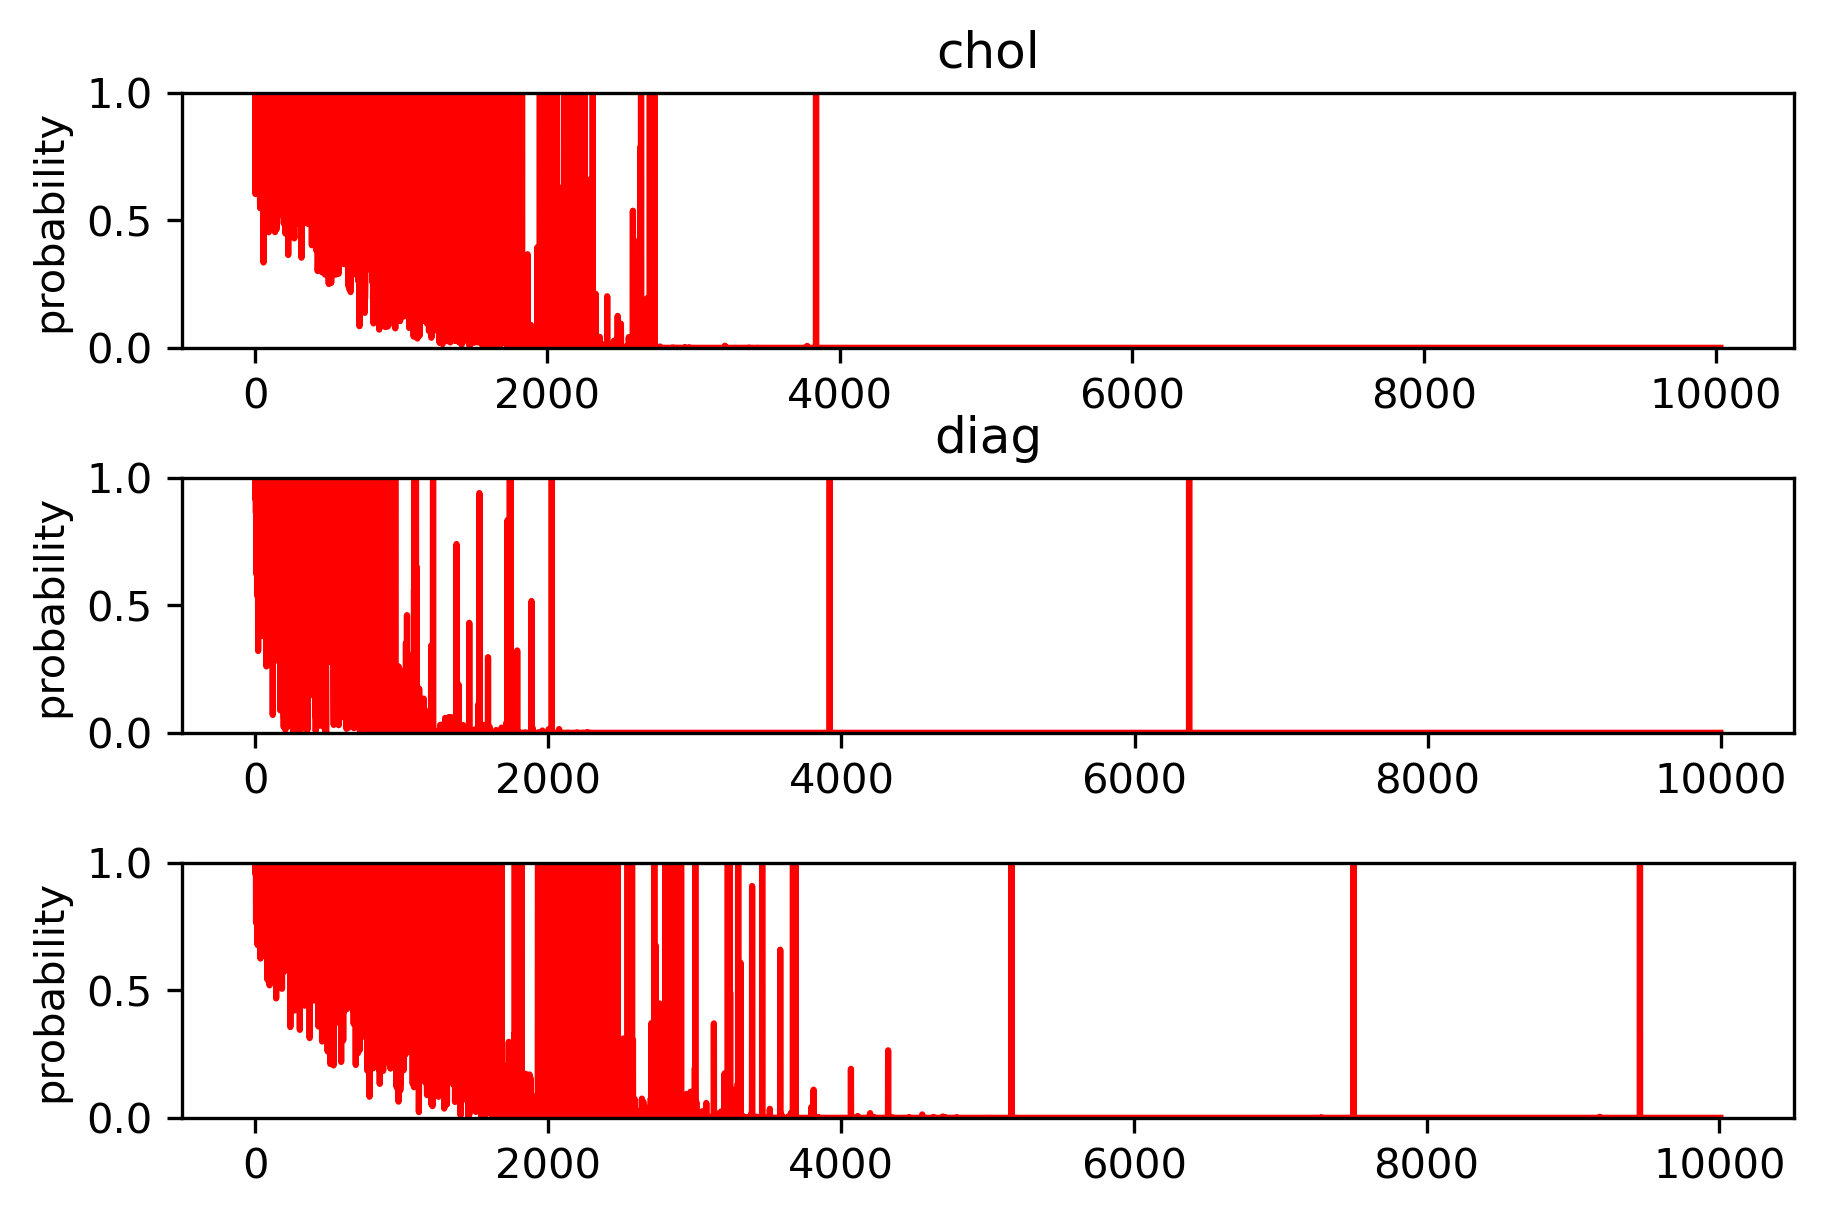

In [52]:
# probability of acceptence
fig, axs = plt.subplots(3)
axs[0].plot(rana_2d_chol.probability_of_acceptance_history, "r", label="chol")
axs[0].set_ylim(0, 1)
axs[1].plot(rana_2d_diag.probability_of_acceptance_history, "r", label="diag")
axs[1].set_ylim(0, 1)
axs[2].plot(rana_2d.probability_of_acceptance_history, "r", label="simple")
axs[2].set_ylim(0, 1)
plt.tight_layout()

axs[0].set_title("chol")
axs[1].set_title("diag")
axs[0].set_ylabel("probability")
axs[1].set_ylabel("probability")
axs[2].set_ylabel("probability")

# Fancy temperature

In [64]:
maximum_markov_chain_length = 250
random_seed = 1

## With Cholesky

In [65]:
np.random.seed(random_seed)
x_max = 500
x_min = -x_max
rana_2d_chol = SimulatedAnnealing(x_length=x_length, x_bounds=(x_min, x_max), objective_function=rana_func,
                              pertubation_method = "Cholesky", bound_enforcing_method=bound_enforcing_method,
                             maximum_archive_length=100,annealing_schedule = "adaptive_cooling", maximum_markov_chain_length= maximum_markov_chain_length,
                                   maximum_function_evaluations=10000)
x_result_chol, objective_result_chol = rana_2d_chol.run()
print(f"x_result = {x_result_chol} \n objective_result = {objective_result_chol} \n "
      f"number of function evaluations = {rana_2d_chol.objective_function_evaluation_count}")

x_result = [252.87715346 244.36801302 483.47207239 453.31515063  25.22248224] 
 objective_result = -1394.424597964198 
 number of function evaluations = 10177


## With diagonal thing

In [66]:
np.random.seed(random_seed )
x_max = 500
x_min = -x_max   #  , 
rana_2d_diag = SimulatedAnnealing(x_length=x_length, x_bounds=(x_min, x_max), objective_function=rana_func,
                              pertubation_method = "Diagonal", 
                                  maximum_archive_length=100,annealing_schedule = "adaptive_cooling", maximum_markov_chain_length= maximum_markov_chain_length,
                                   maximum_function_evaluations=10000, bound_enforcing_method=bound_enforcing_method)
# annealing_schedule = "adaptive_cooling", 
x_result_diag, objective_result_diag = rana_2d_diag.run()
print(f"x_result = {x_result_diag} \n objective_result = {objective_result_diag} \n "
      f"number of function evaluations = {rana_2d_diag.objective_function_evaluation_count}")

x_result = [144.13198387 -50.7264919  472.14382786 439.35124674  24.94165199] 
 objective_result = -1258.0180992047171 
 number of function evaluations = 10230


# Simple

In [67]:
np.random.seed(random_seed )
x_max = 500
x_min = -x_max
rana_2d = SimulatedAnnealing(x_length=x_length, x_bounds=(x_min, x_max), objective_function=rana_func,
                             maximum_archive_length=100,annealing_schedule = "adaptive_cooling", maximum_markov_chain_length= maximum_markov_chain_length,
                                   maximum_function_evaluations=10000)
x_result, objective_result = rana_2d.run()
print(f"x_result = {x_result} \n objective_result = {objective_result} \n "
      f"number of function evaluations = {rana_2d.objective_function_evaluation_count}")

x_result = [-500.        -500.         477.6239983  500.        -500.       ] 
 objective_result = -1781.6236217433034 
 number of function evaluations = 10114


# Results

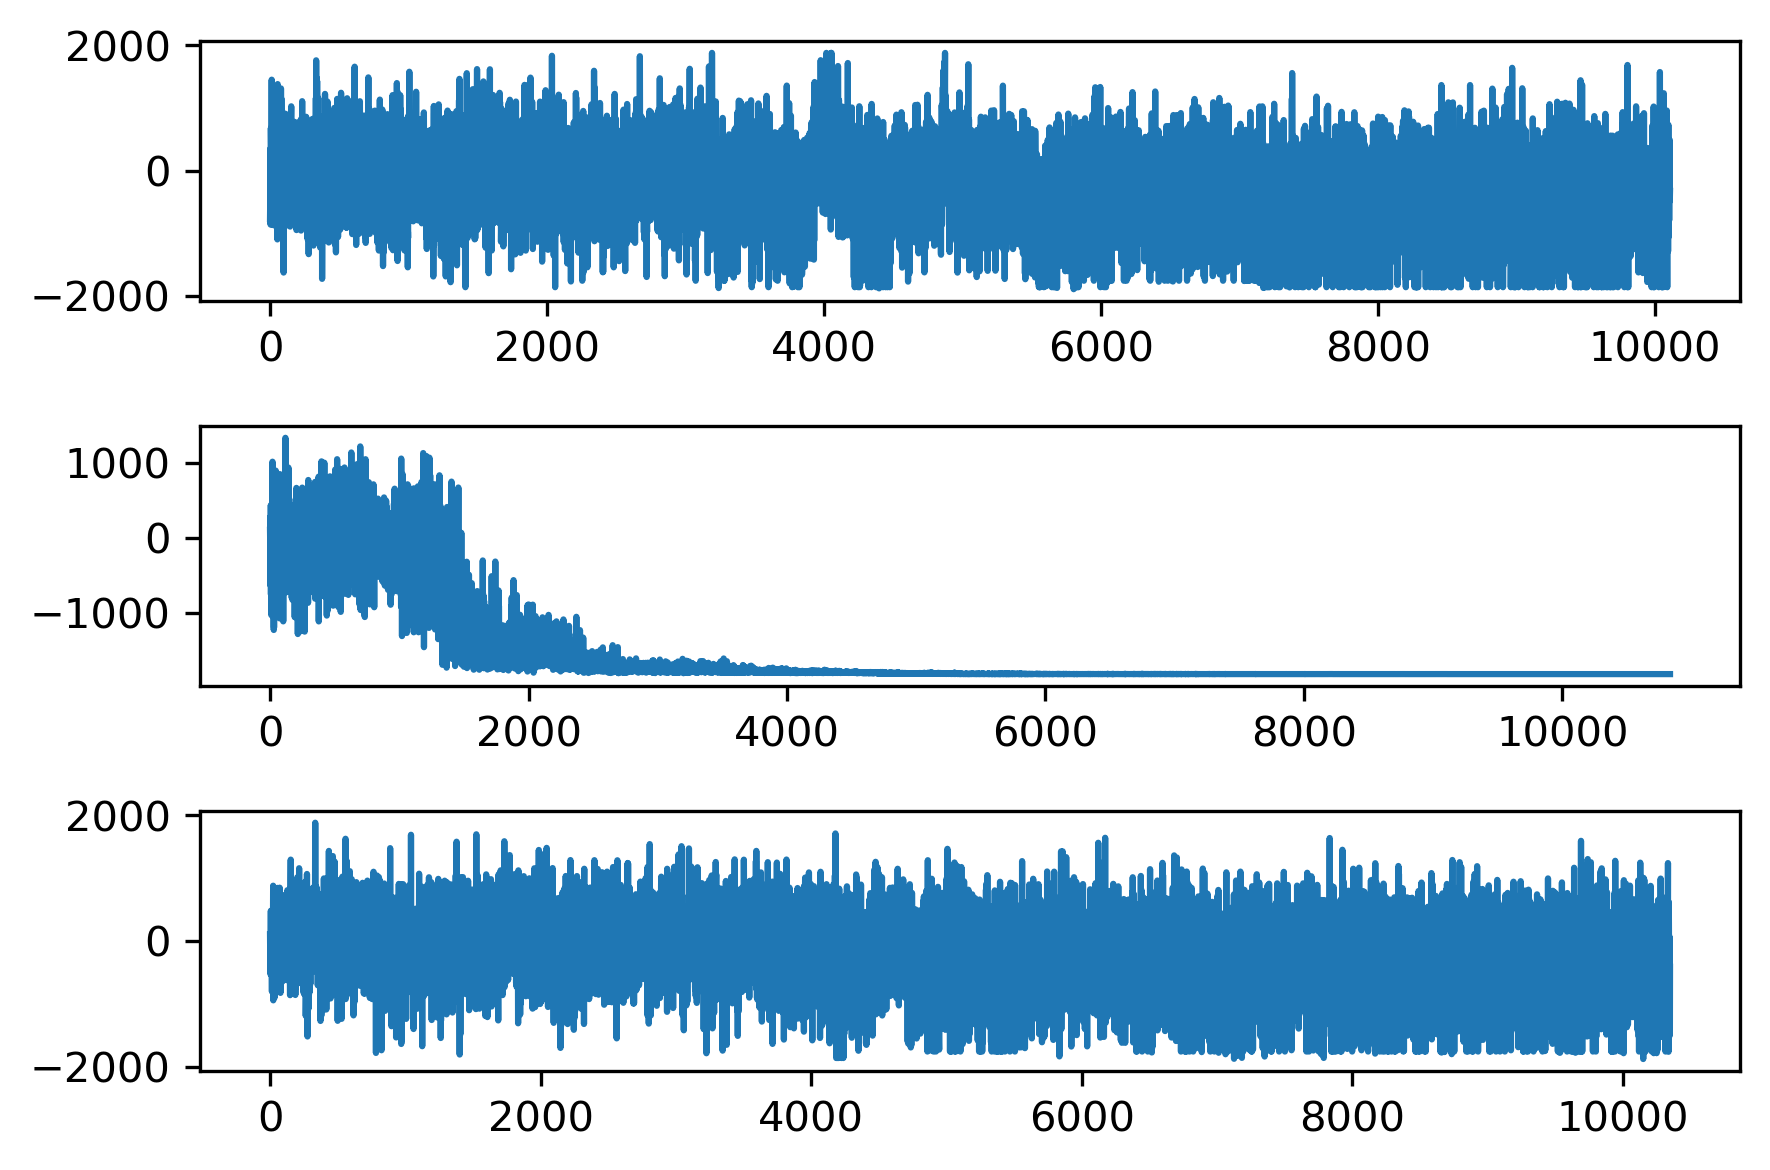

In [41]:
fig, axs = plt.subplots(3)
axs[0].plot(rana_2d_chol.objective_history, label="chol")
axs[1].plot(rana_2d_diag.objective_history, label="diag")
axs[2].plot(rana_2d.objective_history, label="simple")
plt.tight_layout()

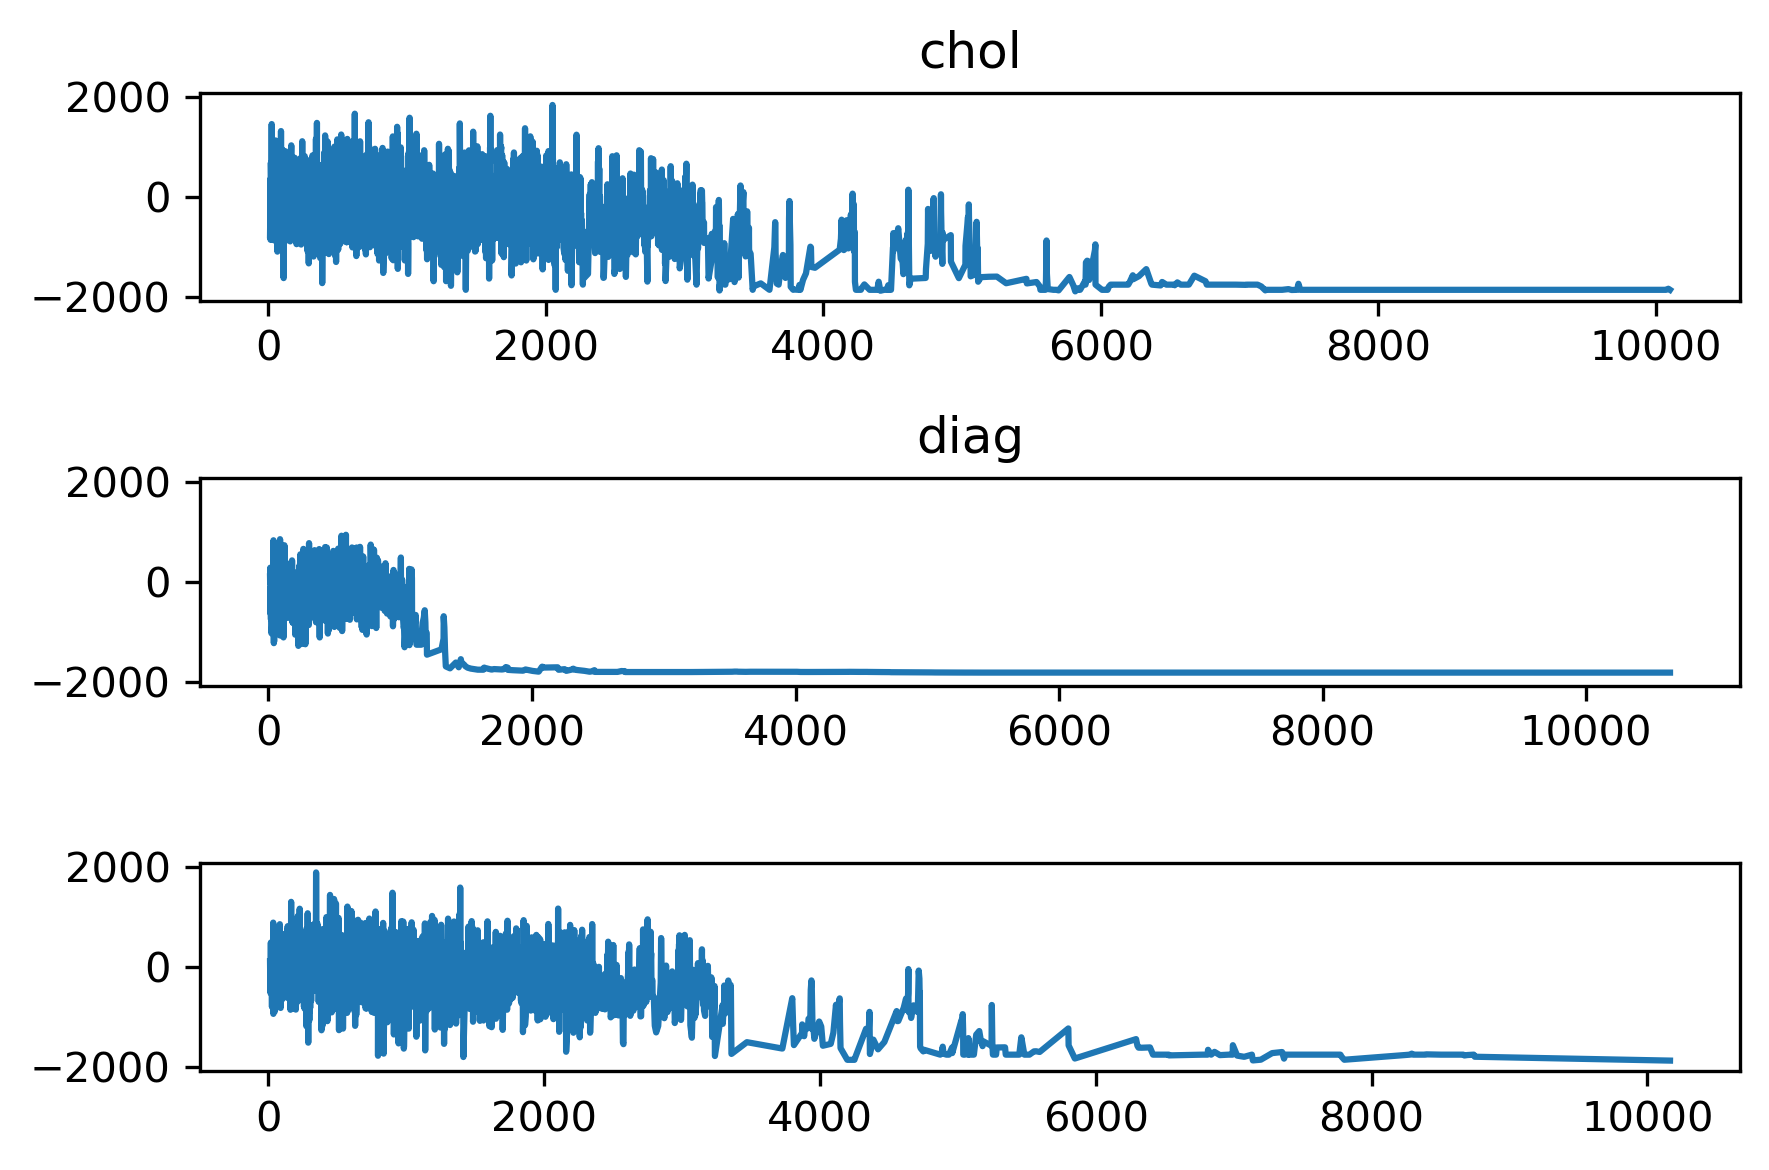

In [42]:
fig, axs = plt.subplots(3, sharey=True)
axs[0].plot(rana_2d_chol.accepted_objective_history_array[:, 1], rana_2d_chol.accepted_objective_history_array[:, 0], label="chol")
axs[1].plot(rana_2d_diag.accepted_objective_history_array[:, 1], rana_2d_diag.accepted_objective_history_array[:, 0], label="diag")
axs[2].plot(rana_2d.accepted_objective_history_array[:, 1], rana_2d.accepted_objective_history_array[:, 0], label="simple")
axs[0].set_title("chol")
axs[1].set_title("diag")
plt.tight_layout()

Text(0.5, 64.16666666666666, 'n_function_evaluations')

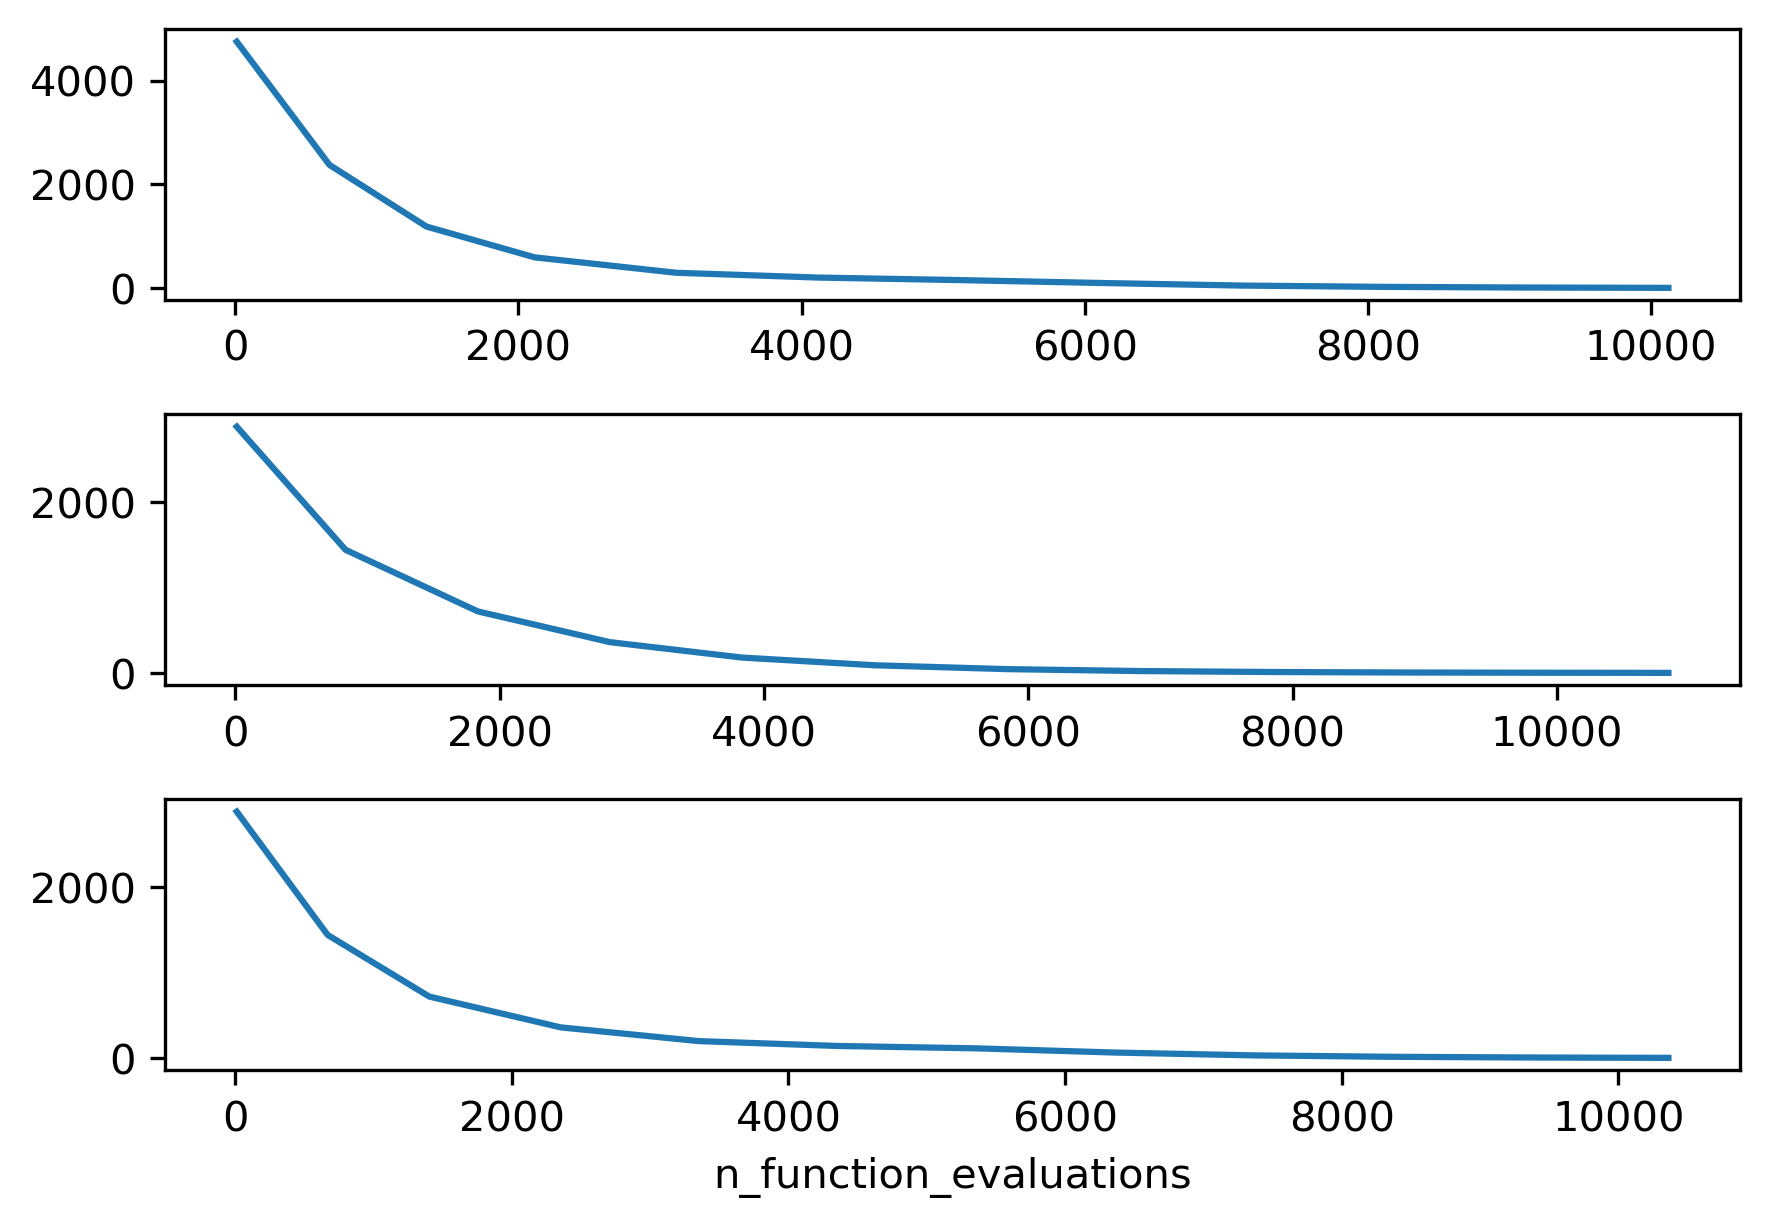

In [43]:
# temperature history
fig, axs = plt.subplots(3)
temp_history_chol = np.array(rana_2d_chol.temperature_history)
axs[0].plot(temp_history_chol[:, 2], temp_history_chol[:, 0], label="chol")
temp_history_diag = np.array(rana_2d_diag.temperature_history)
axs[1].plot(temp_history_diag[:, 2], temp_history_diag[:, 0], label="diag")
temp_history = np.array(rana_2d.temperature_history)
axs[2].plot(temp_history[:, 2], temp_history[:, 0], label="simple")
plt.tight_layout()
axs[2].set_xlabel("n_function_evaluations")

(0.0, 1.0)

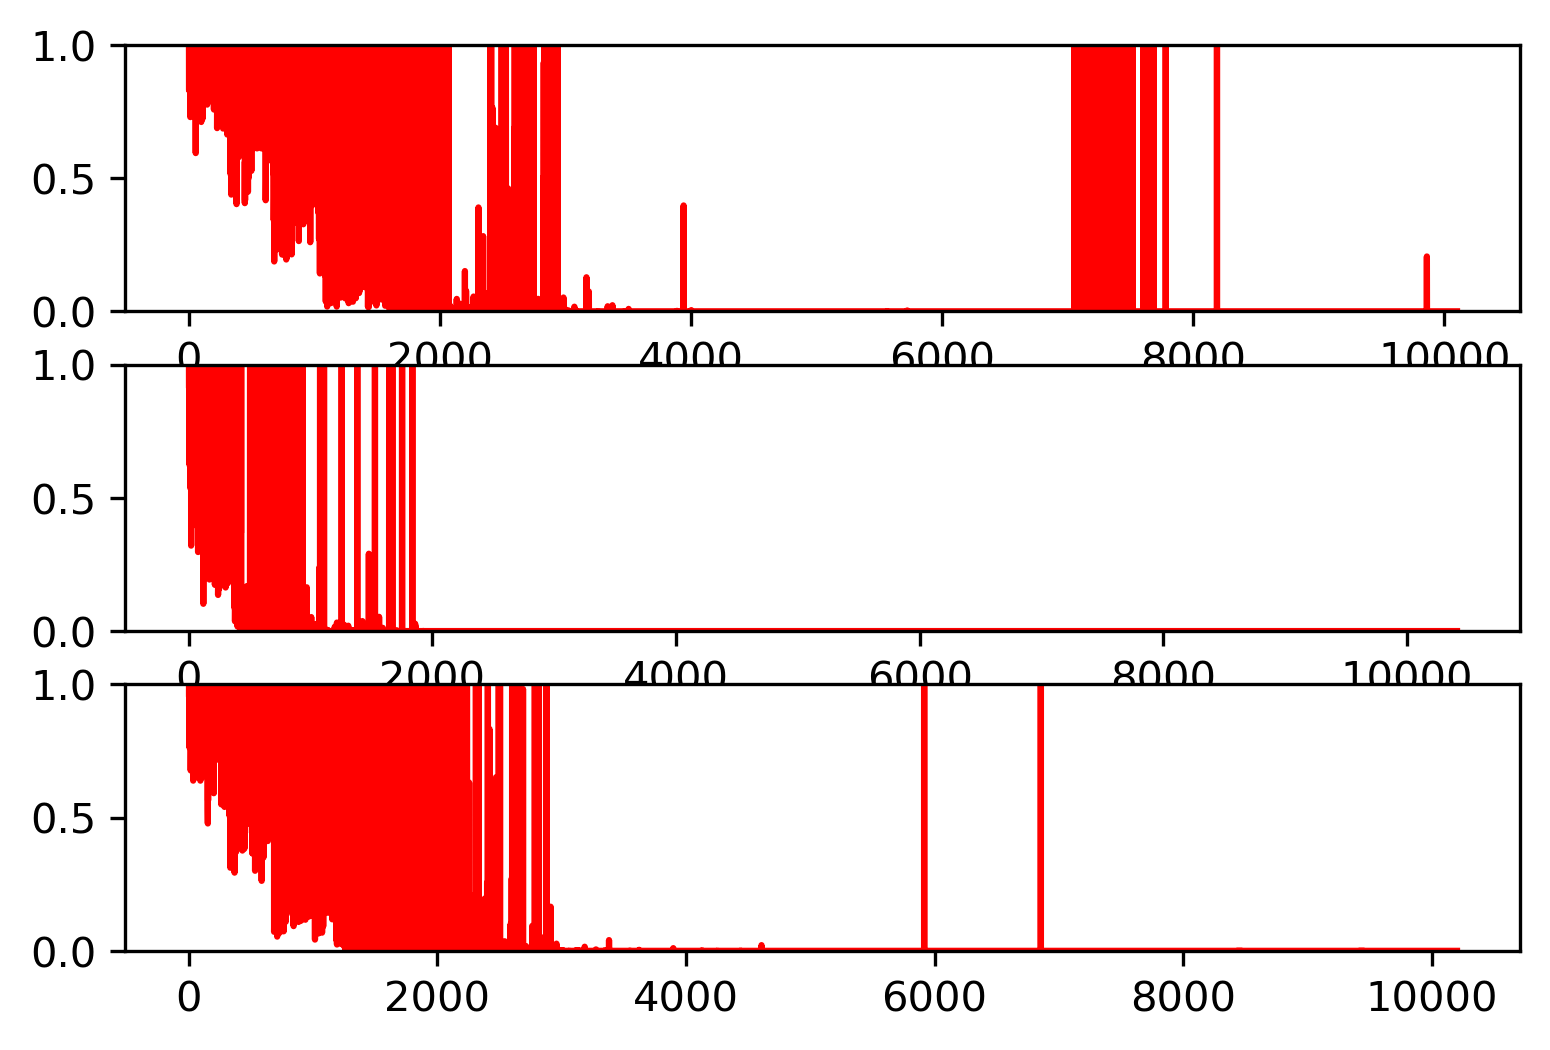

In [36]:
# probability of acceptence
fig, axs = plt.subplots(3)
axs[0].plot(rana_2d_chol.probability_of_acceptance_history, "r", label="chol")
axs[0].set_ylim(0, 1)
axs[1].plot(rana_2d_diag.probability_of_acceptance_history, "r", label="diag")
axs[1].set_ylim(0, 1)
axs[2].plot(rana_2d.probability_of_acceptance_history, "r", label="simple")
axs[2].set_ylim(0, 1)

# old

In [ ]:
fig, ax = plt.subplots(1)
temp_history_chol = np.array(rana_2d_chol.temperature_history)
ax.plot(temp_history_chol[:, 1], temp_history_chol[:, 0])

In [ ]:
plt.plot(rana_2d_chol.probability_of_acceptance_history, "r")
plt.ylim(0, 1)

In [ ]:
plt.plot(rana_2d_chol.objective_history)

# Diag

In [ ]:
fig, ax = plt.subplots(1)
temp_history = np.array(rana_2d_diag.temperature_history)
ax.plot(temp_history[:, 1], temp_history[:, 0])

In [ ]:
plt.plot(rana_2d_diag.probability_of_acceptance_history, "r")
plt.ylim(0, 1)

In [ ]:
plt.plot(rana_2d_diag.objective_history)

# Without any fancy step size stuff

In [ ]:
fig, ax = plt.subplots(1)
temp_history = np.array(rana_2d.temperature_history)
ax.plot(temp_history[:, 1], temp_history[:, 0])

In [ ]:
plt.plot(rana_2d.probability_of_acceptance_history, "r")
plt.ylim(0, 1)

In [ ]:
plt.plot(rana_2d.objective_history)